# Data Preparation

## Data import and checking

In [2]:
import os
os.path.getsize("../data/raw/raw_data_file.csv")


FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/raw/raw_data_file.csv'

In [3]:
import pandas as pd

df = pd.read_csv("../data/raw/obesity.csv")
obesity_df = df.copy()
obesity_df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
obesity_df.shape

(2111, 17)

In [5]:
obesity_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
obesity_df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

#### By checking the data we udnersatnd that we will use column "NObeyesdad" as our Target.

In [7]:
obesity_df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [8]:
obesity_df.Age.max()

61.0

In [9]:
obesity_df.Height.max()

1.98

In [10]:
obesity_df.Weight.max()

173.0

In [11]:
obesity_df.family_history_with_overweight.unique()

array(['yes', 'no'], dtype=object)

In [12]:
obesity_df.FAVC.unique()

array(['no', 'yes'], dtype=object)

In [13]:
obesity_df.FCVC.unique()

array([2.      , 3.      , 1.      , 2.450218, 2.880161, 2.00876 ,
       2.596579, 2.591439, 2.392665, 1.123939, 2.027574, 2.658112,
       2.88626 , 2.714447, 2.750715, 1.4925  , 2.205439, 2.059138,
       2.310423, 2.823179, 2.052932, 2.596364, 2.767731, 2.815157,
       2.737762, 2.568063, 2.524428, 2.971574, 1.0816  , 1.270448,
       1.344854, 2.959658, 2.725282, 2.844607, 2.44004 , 2.432302,
       2.592247, 2.449267, 2.929889, 2.015258, 1.031149, 1.592183,
       1.21498 , 1.522001, 2.703436, 2.362918, 2.14084 , 2.5596  ,
       2.336044, 1.813234, 2.724285, 2.71897 , 1.133844, 1.757466,
       2.979383, 2.204914, 2.927218, 2.88853 , 2.890535, 2.530066,
       2.241606, 1.003566, 2.652779, 2.897899, 2.483979, 2.945967,
       2.478891, 2.784464, 1.005578, 2.938031, 2.842102, 1.889199,
       2.943749, 2.33998 , 1.950742, 2.277436, 2.371338, 2.984425,
       2.977018, 2.663421, 2.753752, 2.318355, 2.594653, 2.886157,
       2.967853, 2.619835, 1.053534, 2.530233, 2.8813  , 2.824

##### We treat Vegetables indicator as an average of the meals per day a person is including vegetables in their diet.

In [14]:
obesity_df.NCP.unique()

array([3.      , 1.      , 4.      , 3.28926 , 3.995147, 1.72626 ,
       2.581015, 1.600812, 1.73762 , 1.10548 , 2.0846  , 1.894384,
       2.857787, 3.765526, 3.285167, 3.691226, 3.156153, 1.07976 ,
       3.559841, 3.891994, 3.240578, 3.904858, 3.11158 , 3.590039,
       2.057935, 3.558637, 2.000986, 3.821168, 3.897078, 3.092116,
       3.286431, 3.592415, 3.754599, 3.566082, 3.725797, 3.520555,
       3.731212, 1.259803, 1.273128, 3.304123, 3.647154, 3.300666,
       3.535016, 1.717608, 2.884479, 3.626815, 1.473088, 3.16645 ,
       3.494849, 2.99321 , 2.127797, 3.90779 , 3.699594, 3.179995,
       1.075553, 3.238258, 3.804944, 1.630846, 3.762778, 3.371832,
       2.705445, 3.34175 , 2.217651, 2.893778, 3.502604, 3.998766,
       3.193671, 1.69608 , 2.812377, 1.612747, 1.082304, 1.882158,
       2.326233, 1.989398, 1.735493, 2.974568, 3.715118, 3.489918,
       3.378859, 3.263201, 3.994588, 3.24934 , 3.087544, 1.163666,
       3.409363, 3.281391, 3.98525 , 3.207071, 3.471536, 3.488

In [15]:
obesity_df.NCP.max()

4.0

##### We treat NCP indicator as an average meals per day a person is eating.

In [16]:
obesity_df.CAEC.unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [17]:
obesity_df.SMOKE.unique()

array(['no', 'yes'], dtype=object)

In [18]:
obesity_df.CH2O.max()

3.0

##### We treat Water indicator as an average water per day a person is drinking

In [19]:
obesity_df.SCC.unique()

array(['no', 'yes'], dtype=object)

In [20]:
obesity_df.FAF.unique()

array([0.      , 3.      , 2.      , ..., 1.414209, 1.139107, 1.026452],
      shape=(1190,))

In [21]:
obesity_df.FAF.max()

3.0

##### We treat FAF (exercise) indicator as the average hours of workout per day a person is eating.

In [22]:
obesity_df.TUE.unique()

array([1.      , 0.      , 2.      , ..., 0.646288, 0.586035, 0.714137],
      shape=(1129,))

In [23]:
obesity_df.TUE.max()

2.0

##### We treat TUE (TECH SCREENS) indicator as the average hours of screentime per day a person is spending.

In [24]:
obesity_df.CALC.unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [25]:
obesity_df.MTRANS.unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [26]:
obesity_df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

## Train - test split

In [27]:
target_col = "NObeyesdad"
X = obesity_df.drop(columns=[target_col])
y = obesity_df[target_col]

In [28]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Normalization, Scaling, One-hot encoding

In [30]:
# first create a list of categorical
cat_cols = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS",
]

In [31]:
# then the numerical variables
num_cols = [c for c in X.columns if c not in cat_cols]

In [32]:
# build a BMI feature as a decent estsimator of obesity
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class BMICreator(BaseEstimator, TransformerMixin):
    def __init__(self, height_col="Height", weight_col="Weight"):
        self.height_col = height_col
        self.weight_col = weight_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        bmi = X[self.weight_col] / (X[self.height_col] ** 2)
        X["BMI"] = bmi
        return X


In [33]:
# preprocessing pipeline
# scaling numberical features and encoding categorical

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocess = Pipeline(
    steps=[
        ("bmi", BMICreator()),
        ("columns", ColumnTransformer(
            transformers=[
                ("num", StandardScaler(), num_cols + ["BMI"]),
                ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
            ]
        ))
    ]
)


## KNN pipeline

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline(steps=[("perp", preprocess), ("model", KNeighborsClassifier())])

In [35]:
knn.fit(X_train, y_train)

Pipeline(steps=[('perp',
                 Pipeline(steps=[('bmi', BMICreator()),
                                 ('columns',
                                  ColumnTransformer(transformers=[('num',
                                                                   StandardScaler(),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight',
                                                                    'FCVC',
                                                                    'NCP',
                                                                    'CH2O',
                                                                    'FAF',
                                                                    'TUE',
                                                                    'BMI']),
                                                                  ('cat',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['Gender',
                                                                    'family_history_with_overweight',
                                                                    'FAVC',
                                                                    'CAEC',
                                                                    'SMOKE',
                                                                    'SCC',
                                                                    'CALC',
                                                                    'MTRANS'])]))])),
                ('model', KNeighborsClassifier())])

## Evaluate model performance

In [36]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
y_pred = knn.predict(X_test)

print("Accuracy:", f"{accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.87


In [37]:
## EXPLORATORY DATA ANALYSIS

# Summary statistics for numerical variables
print(obesity_df.describe())

# Summary for categorical variables
print(obesity_df.describe(include=['object']))

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

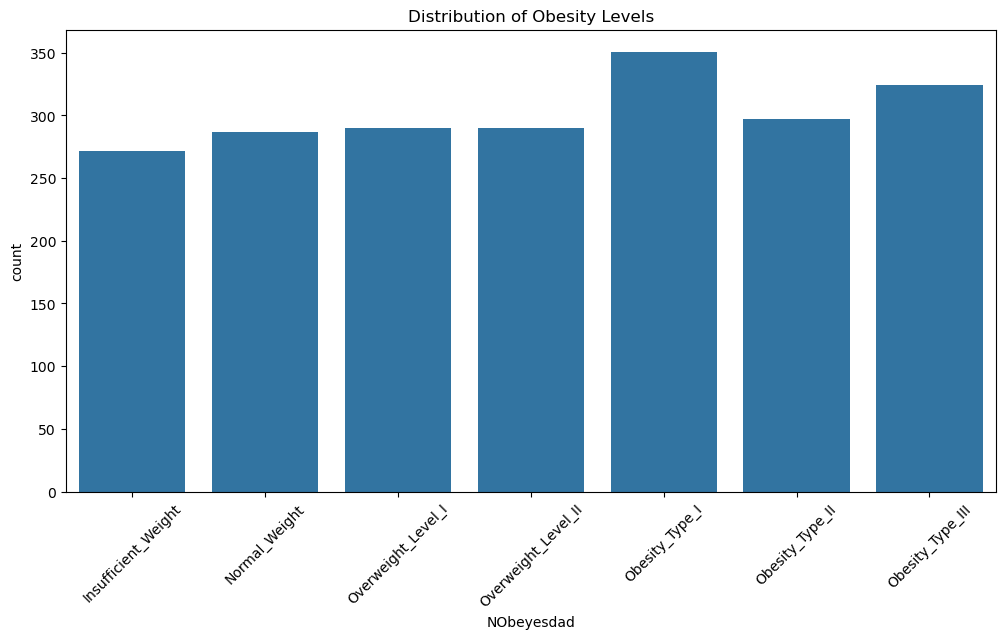

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the order so 'Insufficient_Weight' is the first item
category_order = [
    'Insufficient_Weight', 
    'Normal_Weight', 
    'Overweight_Level_I', 
    'Overweight_Level_II', 
    'Obesity_Type_I', 
    'Obesity_Type_II', 
    'Obesity_Type_III'
]

plt.figure(figsize=(12, 6))
# Using the order parameter to ensure 'Insufficient_Weight' comes first
sns.countplot(data=obesity_df, x='NObeyesdad', order=category_order)
plt.xticks(rotation=45)
plt.title('Distribution of Obesity Levels')
plt.show()

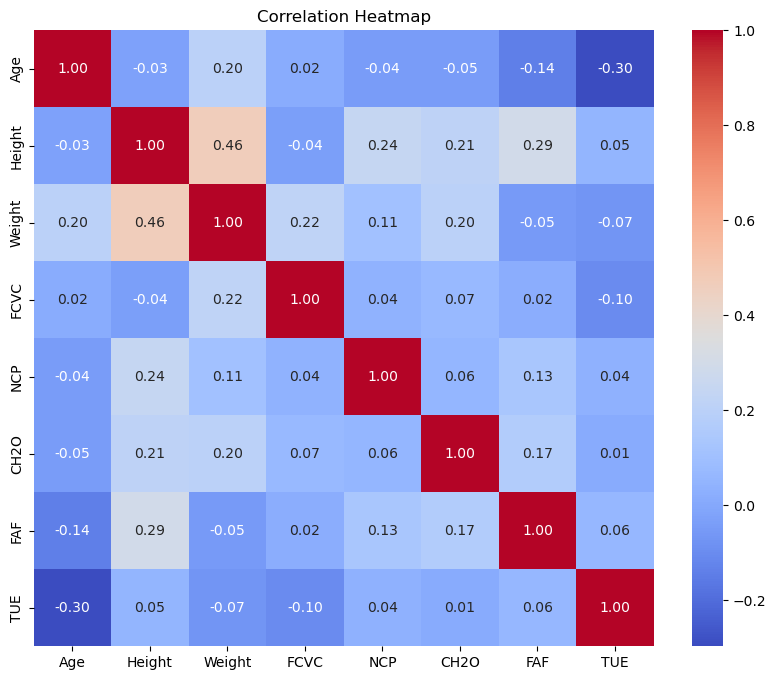

In [39]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(obesity_df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

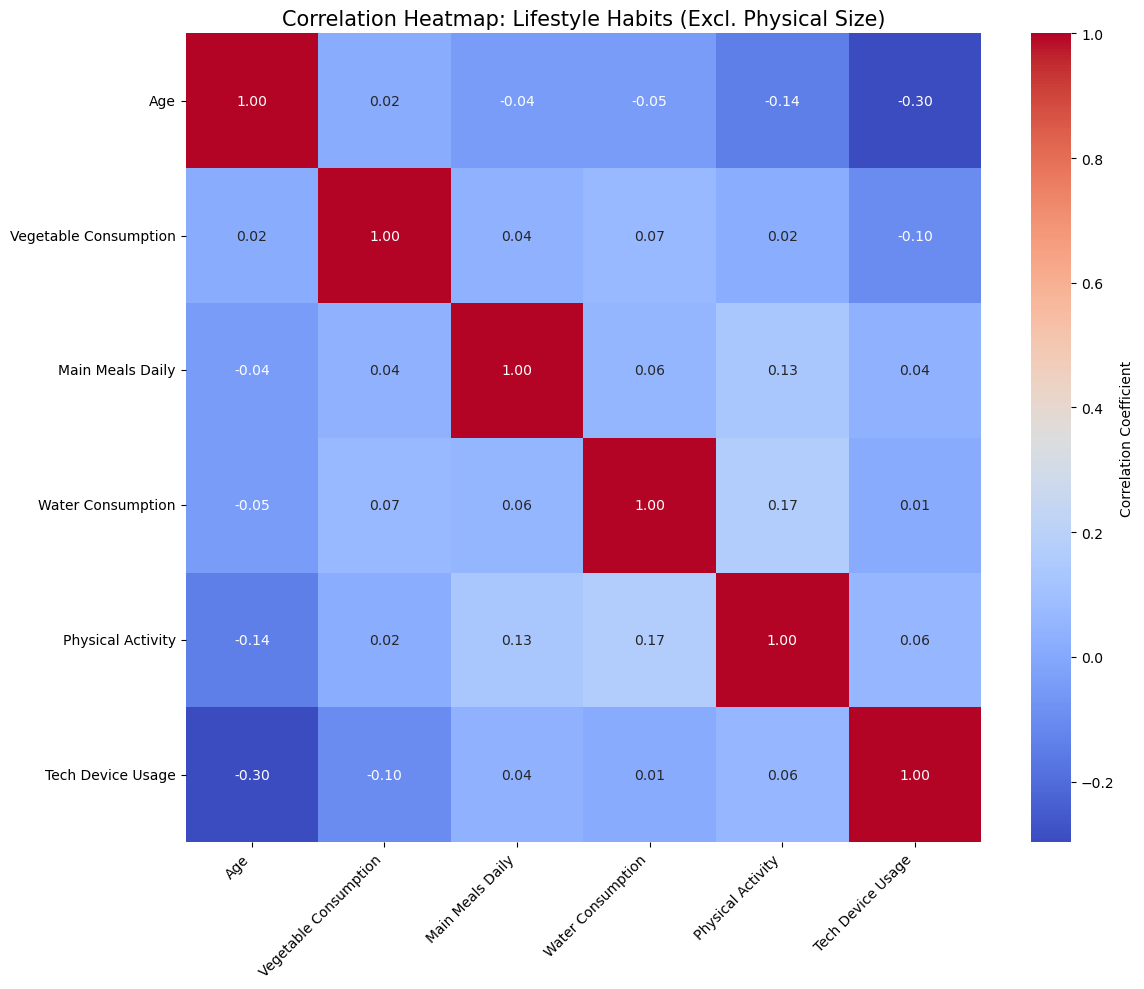

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Map the technical names to descriptive labels
rename_dict = {
    "FAVC": "High Caloric Food",
    "FCVC": "Vegetable Consumption",
    "NCP": "Main Meals Daily",
    "CAEC": "Food Between Meals",
    "SMOKE": "Smoking",
    "CH2O": "Water Consumption",
    "SCC": "Calorie Monitoring",
    "FAF": "Physical Activity",
    "TUE": "Tech Device Usage",
    "CALC": "Alcohol Consumption",
    "MTRANS": "Transportation Mode",
    "Age": "Age"
}

# 2. Select numerical columns and exclude Weight/Height
numerical_df = obesity_df.select_dtypes(include=['float64', 'int64'])
cols_to_exclude = ['Weight', 'Height']
reduced_df = numerical_df.drop(columns=cols_to_exclude, errors='ignore')

# 3. Rename columns using the dictionary
reduced_df = reduced_df.rename(columns=rename_dict)

# 4. Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Heatmap: Lifestyle Habits (Excl. Physical Size)', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

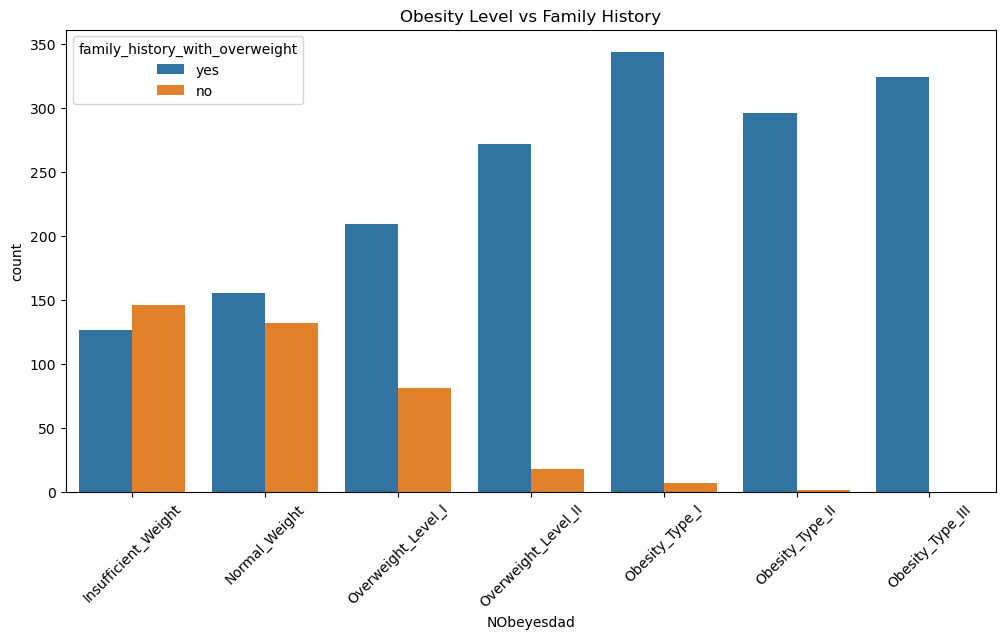

In [49]:
# Relationship between Family History and Obesity Levels

# Define the logical order of weight categories
category_order = [
    'Insufficient_Weight', 
    'Normal_Weight', 
    'Overweight_Level_I', 
    'Overweight_Level_II', 
    'Obesity_Type_I', 
    'Obesity_Type_II', 
    'Obesity_Type_III'
]

# Relationship between Family History and Obesity Levels
plt.figure(figsize=(12, 6))
sns.countplot(
    data=obesity_df, 
    x='NObeyesdad', 
    hue='family_history_with_overweight', 
    order=category_order  # This ensures 'Insufficient_Weight' is first
)
plt.xticks(rotation=45)
plt.title('Obesity Level vs Family History')
plt.show()

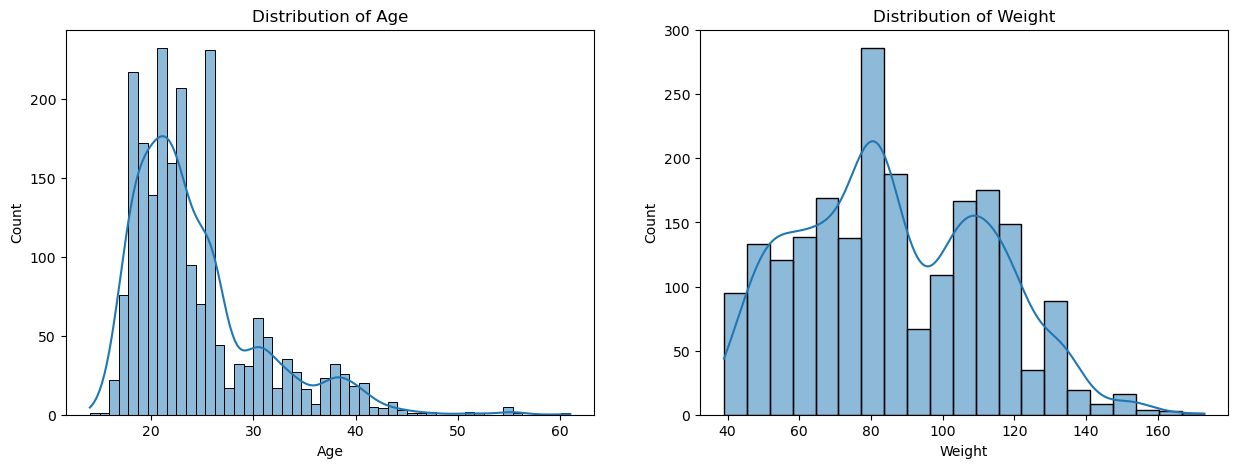

In [42]:
# Distribution of Age and Weight
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(obesity_df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')

sns.histplot(obesity_df['Weight'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Weight')

plt.show()